In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('allteams-nice-NI.csv')

In [4]:
bPlanes = pd.read_csv('BlitzQuantReg-10r-planes.csv')

In [46]:
bPlanes

,Unnamed: 0,qt,intercept,storm_coef,puzzle_coef,scf_lower_bound,scf_upper_bound,pcf_lower_bound,pcf_upper_bound
0,0,0.1,22.712105,17.817275,0.401293,17.149098,18.485453,0.374420,0.428165
1,1,0.2,81.352587,17.713339,0.411857,17.221158,18.205520,0.391679,0.432036
2,2,0.3,124.855876,17.210013,0.427009,16.782067,17.637959,0.409184,0.444834
3,3,0.4,158.645875,16.756649,0.441736,16.380811,17.132486,0.425776,0.457695
4,4,0.5,194.225300,16.383230,0.451914,16.019242,16.747218,0.436158,0.467670
5,5,0.6,227.091933,16.015120,0.463256,15.681725,16.348514,0.448534,0.477978
6,6,0.7,275.052400,15.448024,0.471649,15.101390,15.794659,0.456032,0.487267
7,7,0.8,335.672682,14.973759,0.476648,14.598978,15.348539,0.459347,0.493950
8,8,0.9,465.236189,14.363549,0.459464,13.891067,14.836030,0.436838,0.482091


In [5]:
rPlanes = pd.read_csv('BlitzQuantReg-10r-planes.csv')

In [6]:
df

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
0,vay_vision,2.0,1846.0,246.0,2087,1785,49,160,2041,67,NaN,NaN
1,ian_fidelino,326.0,2447.0,146.0,1282,2297,45,164,2332,55,1.0,35.0
2,bltsandwich64,228.0,1949.0,190.0,92,1439,59,62,1640,75,NaN,NaN
3,rchoi2010,NaN,NaN,NaN,2,1145,227,0,1500,500,NaN,NaN
4,furyempire,49.0,1425.0,80.0,4,1724,170,6,1568,145,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205121,dustin1304,2243.0,1535.0,61.0,33,905,100,229,1320,46,30.0,20.0
205122,waschbaer231,270.0,2190.0,197.0,724,2321,87,60,2152,93,NaN,NaN
205123,jewelz83,77.0,2184.0,198.0,46,1693,85,2,1642,253,NaN,NaN
205124,klonkrieger,52.0,1743.0,87.0,2525,1971,45,8,1686,168,NaN,NaN


In [7]:
df_nona = df.dropna()
prune = df_nona[(df_nona['blitz-rd']<100)&(df_nona['puzzle-rd']<100)&
                        (df_nona['rapid-rd']<100)&(df_nona['storm-runs']>10)]
prune

,id,puzzle-games,puzzle-rating,puzzle-rd,blitz-games,blitz-rating,blitz-rd,rapid-games,rapid-rating,rapid-rd,storm-runs,storm-score
7,bumblezz,1007.0,1907.0,61.0,110,1254,45,419,1289,46,60.0,24.0
14,coymagician171,1804.0,1705.0,76.0,106,1199,46,392,1297,52,15.0,17.0
16,sohil_526,3289.0,1511.0,63.0,411,1090,48,533,1213,46,30.0,24.0
20,sadecedenedim,44.0,2206.0,90.0,27,1620,88,24,2103,86,30.0,39.0
32,windrose11,2790.0,1752.0,74.0,2523,1502,45,439,1585,47,99.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205093,leopold2003,698.0,2038.0,61.0,530,1687,45,201,1789,59,49.0,31.0
205094,masterion2,11209.0,2036.0,64.0,1386,1771,46,348,1927,53,140.0,46.0
205095,lordnyrob,3580.0,2391.0,63.0,531,1789,48,102,1823,52,617.0,45.0
205117,voechr,4553.0,2180.0,66.0,3567,1973,45,72,2115,66,141.0,51.0


In [22]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np

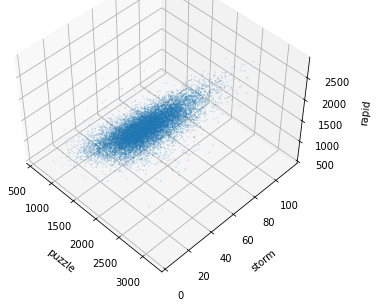

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(prune['puzzle-rating'], prune['storm-score'], prune['rapid-rating'], marker=".",s=.1)
ax.set_xlabel('puzzle')
ax.set_ylabel('storm')
ax.set_zlabel('rapid')
ax.view_init(elev=45,azim=-45)
ax.dist=7

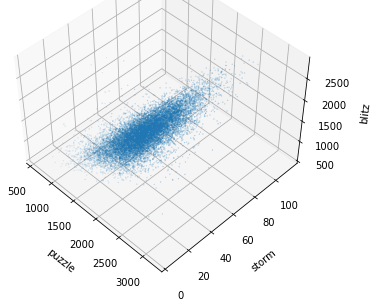

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(prune['puzzle-rating'], prune['storm-score'], prune['blitz-rating'], marker=".",s=.1)
ax.set_xlabel('puzzle')
ax.set_ylabel('storm')
ax.set_zlabel('blitz')
ax.view_init(elev=45,azim=-45)
ax.dist=7

In [54]:
pPoints = np.linspace(600,3000,10)
sPoints = np.linspace(5,80,10)


In [59]:
X,Y = np.meshgrid(pPoints,sPoints)
bmZ=bPlanes['storm_coef'][4]*Y + bPlanes['puzzle_coef'][4]*X + bPlanes['intercept'][4]
blZ=bPlanes['storm_coef'][0]*Y + bPlanes['puzzle_coef'][0]*X + bPlanes['intercept'][0]
bhZ=bPlanes['storm_coef'][8]*Y + bPlanes['puzzle_coef'][8]*X + bPlanes['intercept'][8]

In [56]:
bZ

array([[ 547.28982795,  667.80021804,  788.31060813,  908.82099823,
        1029.33138832, 1149.84177841, 1270.3521685 , 1390.86255859,
        1511.37294869, 1631.88333878],
       [ 683.81674503,  804.32713512,  924.83752522, 1045.34791531,
        1165.8583054 , 1286.36869549, 1406.87908558, 1527.38947568,
        1647.89986577, 1768.41025586],
       [ 820.34366211,  940.85405221, 1061.3644423 , 1181.87483239,
        1302.38522248, 1422.89561258, 1543.40600267, 1663.91639276,
        1784.42678285, 1904.93717294],
       [ 956.8705792 , 1077.38096929, 1197.89135938, 1318.40174947,
        1438.91213957, 1559.42252966, 1679.93291975, 1800.44330984,
        1920.95369993, 2041.46409003],
       [1093.39749628, 1213.90788637, 1334.41827646, 1454.92866656,
        1575.43905665, 1695.94944674, 1816.45983683, 1936.97022692,
        2057.48061702, 2177.99100711],
       [1229.92441336, 1350.43480345, 1470.94519355, 1591.45558364,
        1711.96597373, 1832.47636382, 1952.98675391, 2073

<IPython.core.display.Javascript object>


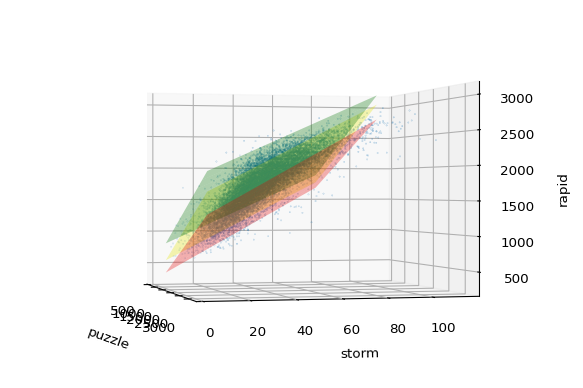

In [84]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, bmZ,color="Yellow",alpha=0.3)
surf = ax.plot_surface(X, Y, bhZ, color="Green",alpha=0.3)
surf = ax.plot_surface(X, Y, blZ, color="Red",alpha=0.3)
ax.scatter(prune['puzzle-rating'], prune['storm-score'], prune['blitz-rating'], marker=".",s=.1)
ax.set_xlabel('puzzle')
ax.set_ylabel('storm')
ax.set_zlabel('rapid')
ax.view_init(elev=0,azim=-15)
ax.dist=7

In [77]:
%matplotlib notebook

In [69]:
%matplotlib inline